In [2]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import missingno as msno
from sklearn.pipeline import Pipeline

from sklearn import set_config
set_config(display="diagram")
pd.set_option('display.max_columns', None)
%matplotlib inline

In [7]:
from google.colab import drive
drive.mount('/content/drive')


ModuleNotFoundError: No module named 'google.colab'

In [168]:

accident = pd.read_csv('/content/drive/MyDrive/accident_data.csv'  , encoding= 'unicode_escape')
vehicle = pd.read_csv('/content/drive/MyDrive/vehicle_data.csv'  , encoding= 'unicode_escape')

In [169]:
df = pd.merge(accident, vehicle , on='Accident_Index')


In [170]:
df

,Accident_Index,1st_Road_Class,1st_Road_Number,2nd_Road_Class,2nd_Road_Number,Accident_Severity,Carriageway_Hazards,Date,Day_of_Week,Did_Police_Officer_Attend_Scene_of_Accident,Junction_Control,Junction_Detail,Latitude,Light_Conditions,Local_Authority_(District),Local_Authority_(Highway),Location_Easting_OSGR,Location_Northing_OSGR,Longitude,LSOA_of_Accident_Location,Number_of_Casualties,Number_of_Vehicles,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Police_Force,Road_Surface_Conditions,Road_Type,Special_Conditions_at_Site,Speed_limit,Time,Urban_or_Rural_Area,Weather_Conditions,Year_x,InScotland,Age_Band_of_Driver,Age_of_Vehicle,Driver_Home_Area_Type,Driver_IMD_Decile,Engine_Capacity_.CC.,Hit_Object_in_Carriageway,Hit_Object_off_Carriageway,Journey_Purpose_of_Driver,Junction_Location,make,model,Propulsion_Code,Sex_of_Driver,Skidding_and_Overturning,Towing_and_Articulation,Vehicle_Leaving_Carriageway,Vehicle_Location.Restricted_Lane,Vehicle_Manoeuvre,Vehicle_Reference,Vehicle_Type,Was_Vehicle_Left_Hand_Drive,X1st_Point_of_Impact,Year_y
0,200501BS00002,B,450.0,C,0.0,Slight,None,05/01/2005,Wednesday,1.0,Auto traffic signal,Crossroads,51.520075,Darkness - lights lit,Kensington and Chelsea,Kensington and Chelsea,524170.0,181650.0,-0.211708,E01002909,1,1,0.0,5.0,Metropolitan Police,Dry,Dual carriageway,None,30,17:36,Urban,Fine no high winds,2005,No,36 - 45,3.0,Data missing or out of range,NaN,8268.0,None,None,Journey as part of work,Leaving roundabout,DENNIS,NaN,Heavy oil,Male,None,No tow/articulation,Did not leave carriageway,0.0,Slowing or stopping,1,Bus or coach (17 or more pass seats),No,Nearside,2005
1,200501BS00003,C,0.0,NaN,0.0,Slight,None,06/01/2005,Thursday,1.0,Data missing or out of range,Not at junction or within 20 metres,51.525301,Darkness - lights lit,Kensington and Chelsea,Kensington and Chelsea,524520.0,182240.0,-0.206458,E01002857,1,2,0.0,0.0,Metropolitan Police,Dry,Single carriageway,None,30,00:15,Urban,Fine no high winds,2005,No,26 - 35,5.0,Urban area,3.0,8300.0,Parked vehicle,None,Journey as part of work,Not at or within 20 metres of junction,DENNIS,NaN,Heavy oil,Male,None,No tow/articulation,Did not leave carriageway,0.0,Going ahead right-hand bend,1,Bus or coach (17 or more pass seats),No,Nearside,2005
2,200501BS00004,A,3220.0,NaN,0.0,Slight,None,07/01/2005,Friday,1.0,Data missing or out of range,Not at junction or within 20 metres,51.482442,NaN,Kensington and Chelsea,Kensington and Chelsea,526900.0,177530.0,-0.173862,E01002840,1,1,0.0,0.0,Metropolitan Police,Dry,Single carriageway,None,30,10:35,Urban,Fine no high winds,2005,No,46 - 55,4.0,Urban area,1.0,1769.0,None,None,Other/Not known (2005-10),Not at or within 20 metres of junction,NISSAN,ALMERA SE AUTO,Petrol,Female,None,No tow/articulation,Did not leave carriageway,0.0,Going ahead other,1,Car,No,Front,2005
3,200501BS00005,NaN,0.0,NaN,0.0,Slight,None,10/01/2005,Monday,1.0,Data missing or out of range,Not at junction or within 20 metres,51.495752,Darkness - lighting unknown,Kensington and Chelsea,Kensington and Chelsea,528060.0,179040.0,-0.156618,E01002863,1,1,0.0,0.0,Metropolitan Police,Wet or damp,Single carriageway,None,30,21:13,Urban,Fine no high winds,2005,No,46 - 55,10.0,Data missing or out of range,NaN,85.0,Kerb,None,Other/Not known (2005-10),Not at or within 20 metres of junction,HONDA,NaN,Petrol,Male,Skidded,No tow/articulation,Did not leave carriageway,0.0,Going ahead other,1,Motorcycle 125cc and under,No,Front,2005
4,200501BS00006,NaN,0.0,NaN,0.0,Slight,None,11/01/2005,Tuesday,1.0,Data missing or out of range,Not at junction or within 20 metres,51.515540,NaN,Kensington and Chelsea,Kensington and Chelsea,524770.0,181160.0,-0.203238,E01002832,1,2,0.0,0.0,Metropolitan Police,Wet or damp,Single carriageway,Oil or diesel,30,12:40,Urban,Raining no high winds,2005,No,46 - 55,1.0,Urban area,4.0,2976.0,None,None,Other/Not known (2005-10),Not at or within 20 metres of junction,AUDI,A4 SPORT CABRIOLET AUTO,Petrol,Male,None,No tow

### Data Cleaning

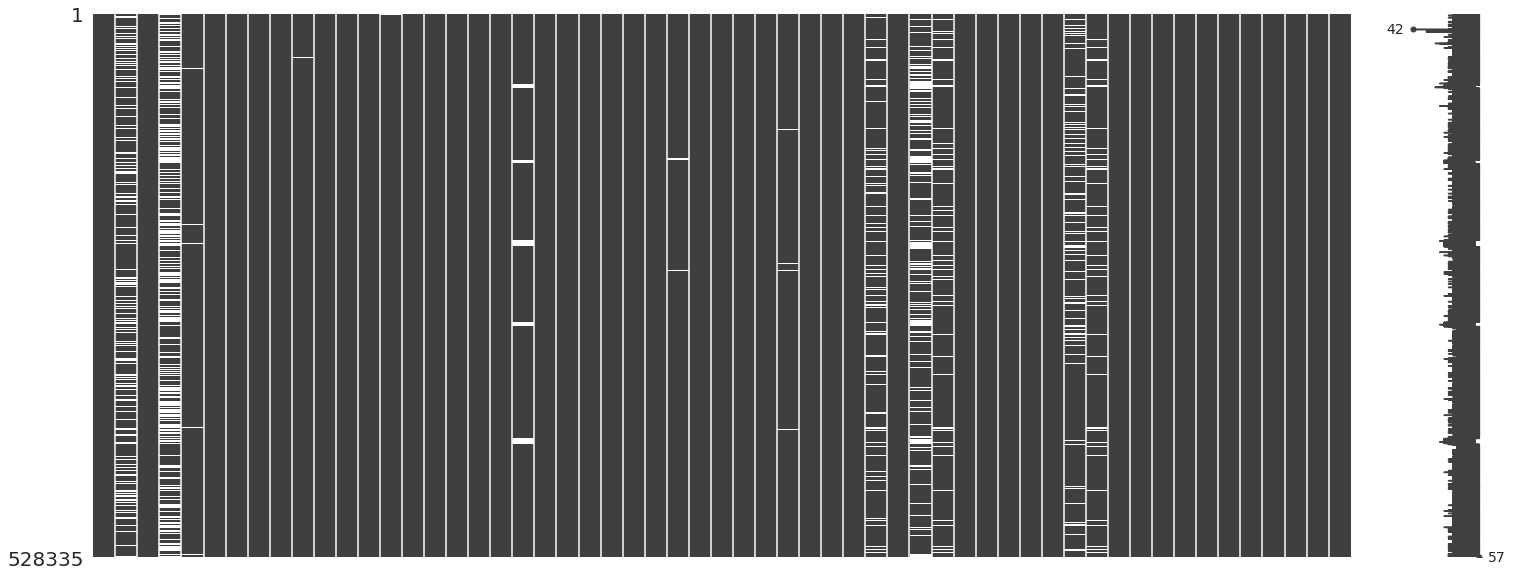

In [171]:
import missingno as msno
msno.matrix(df)

In [172]:
df.isnull().mean()*100

Accident_Index                                  0.000000
1st_Road_Class                                 24.620553
1st_Road_Number                                 0.000189
2nd_Road_Class                                 38.700635
2nd_Road_Number                                 0.849840
Accident_Severity                               0.000000
Carriageway_Hazards                             0.002839
Date                                            0.000000
Day_of_Week                                     0.000000
Did_Police_Officer_Attend_Scene_of_Accident     0.012492
Junction_Control                                0.000000
Junction_Detail                                 0.000000
Latitude                                        0.004353
Light_Conditions                                0.236024
Local_Authority_(District)                      0.000000
Local_Authority_(Highway)                       0.000000
Location_Easting_OSGR                           0.004353
Location_Northing_OSGR         

In [173]:
missing_5percent=[var for var in df.columns if df[var].isnull().mean() < 0.05 and 
            df[var].isnull().mean() > 0]

missing_5percent

['1st_Road_Number',
 '2nd_Road_Number',
 'Carriageway_Hazards',
 'Did_Police_Officer_Attend_Scene_of_Accident',
 'Latitude',
 'Light_Conditions',
 'Location_Easting_OSGR',
 'Location_Northing_OSGR',
 'Longitude',
 'LSOA_of_Accident_Location',
 'Pedestrian_Crossing-Human_Control',
 'Pedestrian_Crossing-Physical_Facilities',
 'Road_Surface_Conditions',
 'Road_Type',
 'Special_Conditions_at_Site',
 'Time',
 'Urban_or_Rural_Area',
 'Weather_Conditions',
 'InScotland',
 'Vehicle_Location.Restricted_Lane']

In [174]:
#identifying columns that contain more than 75 percent missing data 
missing_75percent=[var for var in df.columns if df[var].isnull().mean() >  0.75]

missing_75percent


[]

In [175]:
# checking Missing unspelled , erroneous Data  

for column in df.columns:
    print(column + ' : ' + str(len(df[column].unique())))
    if(len(df[column].unique()) < 100):
        print(column + ' : ' + str(df[column].unique()))
    print('\n')

Accident_Index : 403235


1st_Road_Class : 6
1st_Road_Class : ['B' 'C' 'A' nan 'Motorway' 'A(M)']


1st_Road_Number : 4324


2nd_Road_Class : 7
2nd_Road_Class : ['C' nan 'Unclassified' 'B' 'A' 'Motorway' 'A(M)']


2nd_Road_Number : 4675


Accident_Severity : 3
Accident_Severity : ['Slight' 'Serious' 'Fatal']


Carriageway_Hazards : 7
Carriageway_Hazards : ['None' 'Other object on road' 'Pedestrian in carriageway - not injured'
 'Vehicle load on road' 'Previous accident'
 'Any animal in carriageway (except ridden horse)' nan]


Date : 2191


Day_of_Week : 7
Day_of_Week : ['Wednesday' 'Thursday' 'Friday' 'Monday' 'Tuesday' 'Sunday' 'Saturday']


Did_Police_Officer_Attend_Scene_of_Accident : 4
Did_Police_Officer_Attend_Scene_of_Accident : [ 1.  2.  3. nan]


Junction_Control : 7
Junction_Control : ['Auto traffic signal' 'Data missing or out of range'
 'Give way or uncontrolled' 'Stop sign' 'Authorised person'
 'Auto traffic sigl' 'Not at junction or within 20 metres']


Junction_Detail : 

In [176]:
# Replacing misspelled values 

df['Junction_Control']=df['Junction_Control'].replace('Auto traffic sigl' ,'Auto traffic signal' )
df['Light_Conditions']=df['Light_Conditions'].replace('Darkness - no lighting' ,'Darkness - lights unlit' )
df['Special_Conditions_at_Site']=df['Special_Conditions_at_Site'].replace('Auto sigl part defective' , 'Auto signal part defective')
df['Special_Conditions_at_Site']=df['Special_Conditions_at_Site'].replace('Auto traffic sigl - out' , 'Auto traffic signal - out')

In [177]:
df['Casuality_GrpSize'] = ''

df.loc[df['Number_of_Casualties']==1, 'Casuality_GrpSize'] = df.loc[df['Number_of_Casualties']==1, 'Casuality_GrpSize'].replace('', 'Single')
df.loc[df['Number_of_Casualties']==2, 'Casuality_GrpSize'] = df.loc[df['Number_of_Casualties']==2, 'Casuality_GrpSize'].replace('', 'couple')
df.loc[(df['Number_of_Casualties']>=3) & (df['Number_of_Casualties']<=5), 'Casuality_GrpSize'] = df.loc[(df['Number_of_Casualties']>=3) & (df['Number_of_Casualties']<=5), 'Casuality_GrpSize'].replace('', 'small_group')
df.loc[(df['Number_of_Casualties']==6) & (df['Number_of_Casualties']==7), 'Casuality_GrpSize'] = df.loc[(df['Number_of_Casualties']==6) & (df['Number_of_Casualties']==7), 'Casuality_GrpSize'].replace('', 'Large FatalGroup')
df.loc[df['Number_of_Casualties']>=8, 'Casuality_GrpSize'] = df.loc[df['Number_of_Casualties']>=8, 'Casuality_GrpSize'].replace('',  'LargerGroup')
df.head(50)

,Accident_Index,1st_Road_Class,1st_Road_Number,2nd_Road_Class,2nd_Road_Number,Accident_Severity,Carriageway_Hazards,Date,Day_of_Week,Did_Police_Officer_Attend_Scene_of_Accident,Junction_Control,Junction_Detail,Latitude,Light_Conditions,Local_Authority_(District),Local_Authority_(Highway),Location_Easting_OSGR,Location_Northing_OSGR,Longitude,LSOA_of_Accident_Location,Number_of_Casualties,Number_of_Vehicles,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Police_Force,Road_Surface_Conditions,Road_Type,Special_Conditions_at_Site,Speed_limit,Time,Urban_or_Rural_Area,Weather_Conditions,Year_x,InScotland,Age_Band_of_Driver,Age_of_Vehicle,Driver_Home_Area_Type,Driver_IMD_Decile,Engine_Capacity_.CC.,Hit_Object_in_Carriageway,Hit_Object_off_Carriageway,Journey_Purpose_of_Driver,Junction_Location,make,model,Propulsion_Code,Sex_of_Driver,Skidding_and_Overturning,Towing_and_Articulation,Vehicle_Leaving_Carriageway,Vehicle_Location.Restricted_Lane,Vehicle_Manoeuvre,Vehicle_Reference,Vehicle_Type,Was_Vehicle_Left_Hand_Drive,X1st_Point_of_Impact,Year_y,Casuality_GrpSize
0,200501BS00002,B,450.0,C,0.0,Slight,None,05/01/2005,Wednesday,1.0,Auto traffic signal,Crossroads,51.520075,Darkness - lights lit,Kensington and Chelsea,Kensington and Chelsea,524170.0,181650.0,-0.211708,E01002909,1,1,0.0,5.0,Metropolitan Police,Dry,Dual carriageway,None,30,17:36,Urban,Fine no high winds,2005,No,36 - 45,3.0,Data missing or out of range,NaN,8268.0,None,None,Journey as part of work,Leaving roundabout,DENNIS,NaN,Heavy oil,Male,None,No tow/articulation,Did not leave carriageway,0.0,Slowing or stopping,1,Bus or coach (17 or more pass seats),No,Nearside,2005,Single
1,200501BS00003,C,0.0,NaN,0.0,Slight,None,06/01/2005,Thursday,1.0,Data missing or out of range,Not at junction or within 20 metres,51.525301,Darkness - lights lit,Kensington and Chelsea,Kensington and Chelsea,524520.0,182240.0,-0.206458,E01002857,1,2,0.0,0.0,Metropolitan Police,Dry,Single carriageway,None,30,00:15,Urban,Fine no high winds,2005,No,26 - 35,5.0,Urban area,3.0,8300.0,Parked vehicle,None,Journey as part of work,Not at or within 20 metres of junction,DENNIS,NaN,Heavy oil,Male,None,No tow/articulation,Did not leave carriageway,0.0,Going ahead right-hand bend,1,Bus or coach (17 or more pass seats),No,Nearside,2005,Single
2,200501BS00004,A,3220.0,NaN,0.0,Slight,None,07/01/2005,Friday,1.0,Data missing or out of range,Not at junction or within 20 metres,51.482442,NaN,Kensington and Chelsea,Kensington and Chelsea,526900.0,177530.0,-0.173862,E01002840,1,1,0.0,0.0,Metropolitan Police,Dry,Single carriageway,None,30,10:35,Urban,Fine no high winds,2005,No,46 - 55,4.0,Urban area,1.0,1769.0,None,None,Other/Not known (2005-10),Not at or within 20 metres of junction,NISSAN,ALMERA SE AUTO,Petrol,Female,None,No tow/articulation,Did not leave carriageway,0.0,Going ahead other,1,Car,No,Front,2005,Single
3,200501BS00005,NaN,0.0,NaN,0.0,Slight,None,10/01/2005,Monday,1.0,Data missing or out of range,Not at junction or within 20 metres,51.495752,Darkness - lighting unknown,Kensington and Chelsea,Kensington and Chelsea,528060.0,179040.0,-0.156618,E01002863,1,1,0.0,0.0,Metropolitan Police,Wet or damp,Single carriageway,None,30,21:13,Urban,Fine no high winds,2005,No,46 - 55,10.0,Data missing or out of range,NaN,85.0,Kerb,None,Other/Not known (2005-10),Not at or within 20 metres of junction,HONDA,NaN,Petrol,Male,Skidded,No tow/articulation,Did not leave carriageway,0.0,Going ahead other,1,Motorcycle 125cc and under,No,Front,2005,Single
4,200501BS00006,NaN,0.0,NaN,0.0,Slight,None,11/01/2005,Tuesday,1.0,Data missing or out of range,Not at junction or within 20 metres,51.515540,NaN,Kensington and Chelsea,Kensington and Chelsea,524770.0,181160.0,-0.203238,E01002832,1,2,0.0,0.0,Metropolitan Police,Wet or damp,Single carriageway,Oil or diesel,30,12:40,Urban,Raining no high winds,2005,No,46 - 55,1.0,Urban area,4.0,2976.0,None,None,Other/Not known (2005-10),Not at or within 20 metres of junction,AUDI,A

In [178]:
df['Age_of_Driver']=df['Age_Band_of_Driver'].str.split('-').str[1]
df.dropna(subset=['Age_of_Driver'], inplace=True)

In [179]:
df['Date'] = pd.to_datetime(df['Date'], format='%d/%m/%Y')
df['Month'] = df['Date'].apply(lambda x:x.month)
#df2['Day']= df2['Date'].apply(lambda x:x.day)
df['Time'] = pd.to_datetime(df['Time'], format='%H:%M')
df['Hour'] = df['Time'].apply(lambda x:x.hour)

In [180]:
df['Accident_Severity'].value_counts()

Slight     410922
Serious     58953
Fatal        6711
Name: Accident_Severity, dtype: int64

In [181]:
#drop the Time, Minute and Date columns
df = df.drop('Time', axis=1)
df = df.drop('Date', axis=1)
df = df.drop('Age_Band_of_Driver', axis=1)
df = df.drop('Driver_Home_Area_Type' , axis=1)
df = df.drop('Number_of_Casualties' , axis=1 )

In [182]:
cat_cols=df.select_dtypes('object').columns
num_cols=df.select_dtypes('number').columns

print( "The Categoical columns are: \n\n", cat_cols )

print("\n\nTotal categorical features are :  ", len(cat_cols))

The Categoical columns are: 

 Index(['Accident_Index', '1st_Road_Class', '2nd_Road_Class',
       'Accident_Severity', 'Carriageway_Hazards', 'Day_of_Week',
       'Junction_Control', 'Junction_Detail', 'Light_Conditions',
       'Local_Authority_(District)', 'Local_Authority_(Highway)',
       'LSOA_of_Accident_Location', 'Police_Force', 'Road_Surface_Conditions',
       'Road_Type', 'Special_Conditions_at_Site', 'Urban_or_Rural_Area',
       'Weather_Conditions', 'InScotland', 'Hit_Object_in_Carriageway',
       'Hit_Object_off_Carriageway', 'Journey_Purpose_of_Driver',
       'Junction_Location', 'make', 'model', 'Propulsion_Code',
       'Sex_of_Driver', 'Skidding_and_Overturning', 'Towing_and_Articulation',
       'Vehicle_Leaving_Carriageway', 'Vehicle_Manoeuvre', 'Vehicle_Type',
       'Was_Vehicle_Left_Hand_Drive', 'X1st_Point_of_Impact',
       'Casuality_GrpSize', 'Age_of_Driver'],
      dtype='object')


Total categorical features are :   36


In [183]:
for i in df.columns:
    if df[i].dtype=='O':
        data_mode = df[i].mode()
        df[i] = df[i].replace(np.NaN, data_mode.values[0])
    else:
        data_mean=df[i].mean()
        df[i] = df[i].replace(np.NaN , data_mean)

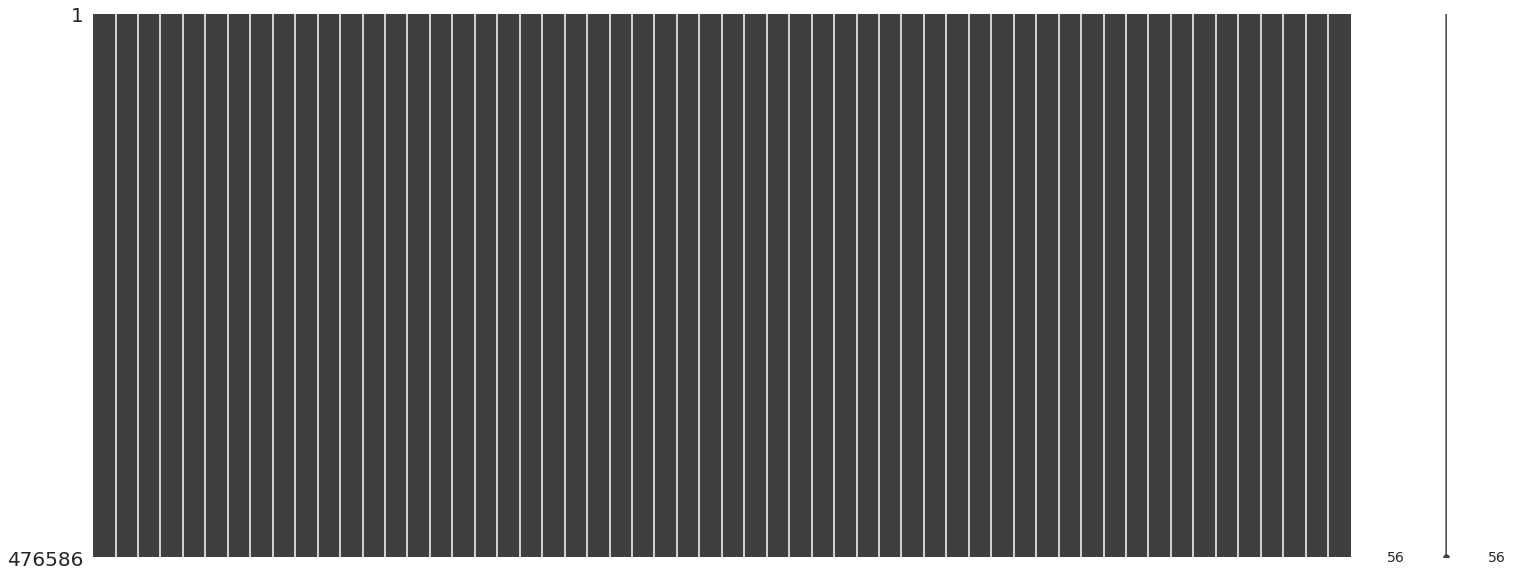

In [184]:
import missingno as msno
msno.matrix(df)

### Label Encoding of Categorical Features

In [185]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
for cat_cols in df.columns:
    if df[cat_cols].dtype =='object':
        df[cat_cols] = label_encoder.fit_transform(df[cat_cols])
    print(  df[cat_cols] )

0              0
1              1
2              2
3              3
4              4
           ...  
528330    374108
528331    374108
528332    374109
528333    374109
528334    374110
Name: Accident_Index, Length: 476586, dtype: int64
0         2
1         3
2         0
3         0
4         0
         ..
528330    0
528331    0
528332    0
528333    0
528334    0
Name: 1st_Road_Class, Length: 476586, dtype: int64
0          450.0
1            0.0
2         3220.0
3            0.0
4            0.0
           ...  
528330      96.0
528331      96.0
528332       9.0
528333       9.0
528334       0.0
Name: 1st_Road_Number, Length: 476586, dtype: float64
0         3
1         5
2         5
3         5
4         5
         ..
528330    5
528331    5
528332    5
528333    5
528334    5
Name: 2nd_Road_Class, Length: 476586, dtype: int64
0         0.0
1         0.0
2         0.0
3         0.0
4         0.0
         ... 
528330    0.0
528331    0.0
528332    0.0
528333    0.0
528334    0.0
N

In [186]:
#df_OneHot = pd.get_dummies(df, columns=['1st_Road_Class', '2nd_Road_Class','Accident_Severity', 'Carriageway_Hazards', 'Day_of_Week','Junction_Control', 'Junction_Detail', 'Light_Conditions','Local_Authority_(District)', 'Local_Authority_(Highway)','LSOA_of_Accident_Location', 'Police_Force', 'Road_Surface_Conditions','Road_Type', 'Special_Conditions_at_Site', 'Urban_or_Rural_Area','Weather_Conditions', 'InScotland', 'Hit_Object_in_Carriageway','Hit_Object_off_Carriageway', 'Journey_Purpose_of_Driver','Junction_Location', 'make', 'model', 'Propulsion_Code','Sex_of_Driver', 'Skidding_and_Overturning', 'Towing_and_Articulation','Vehicle_Leaving_Carriageway', 'Vehicle_Manoeuvre', 'Vehicle_Type', 'Was_Vehicle_Left_Hand_Drive', 'X1st_Point_of_Impact','Casuality_GrpSize', 'Age_of_Driver'  ])
#df_OneHot.head()

In [187]:
df['Accident_Severity'].value_counts()

2    410922
1     58953
0      6711
Name: Accident_Severity, dtype: int64

### Creating dependent and independent varaibles

In [188]:
# Creating dependent and independent variables
X=df.drop(['Accident_Severity','Accident_Index'], axis=1 )
Y=df[['Accident_Severity']]

### Scaling

In [189]:
from sklearn.preprocessing import MinMaxScaler
min_max_scaler = MinMaxScaler()
X_scaled_minmax = min_max_scaler.fit_transform(X)
X=pd.DataFrame( X_scaled_minmax, columns=X.columns)
X.head()



,1st_Road_Class,1st_Road_Number,2nd_Road_Class,2nd_Road_Number,Carriageway_Hazards,Day_of_Week,Did_Police_Officer_Attend_Scene_of_Accident,Junction_Control,Junction_Detail,Latitude,Light_Conditions,Local_Authority_(District),Local_Authority_(Highway),Location_Easting_OSGR,Location_Northing_OSGR,Longitude,LSOA_of_Accident_Location,Number_of_Vehicles,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Police_Force,Road_Surface_Conditions,Road_Type,Special_Conditions_at_Site,Speed_limit,Urban_or_Rural_Area,Weather_Conditions,Year_x,InScotland,Age_of_Vehicle,Driver_IMD_Decile,Engine_Capacity_.CC.,Hit_Object_in_Carriageway,Hit_Object_off_Carriageway,Journey_Purpose_of_Driver,Junction_Location,make,model,Propulsion_Code,Sex_of_Driver,Skidding_and_Overturning,Towing_and_Articulation,Vehicle_Leaving_Carriageway,Vehicle_Location.Restricted_Lane,Vehicle_Manoeuvre,Vehicle_Reference,Vehicle_Type,Was_Vehicle_Left_Hand_Drive,X1st_Point_of_Impact,Year_y,Casuality_GrpSize,Age_of_Driver,Month,Hour
0,0.50,0.045005,0.6,0.0,0.2,1.000000,0.0,0.2,0.000000,0.148075,0.333333,0.407407,0.427632,0.777891,0.142813,0.787586,0.124379,0.000000,0.0,0.625,0.5,0.0,0.00,0.428571,0.333333,1.0,0.142857,0.0,0.0,0.024390,0.471358,0.086115,0.583333,0.545455,0.4,0.777778,0.233990,0.346014,0.500,0.5,0.500000,0.666667,0.111111,0.0,0.666667,0.0,0.066667,0.5,0.8,0.0,0.5,0.555556,0.0,0.739130
1,0.75,0.000000,1.0,0.0,0.2,0.666667,0.0,0.4,0.444444,0.148557,0.333333,0.407407,0.427632,0.778484,0.143305,0.788152,0.122179,0.032258,0.0,0.000,0.5,0.0,0.75,0.428571,0.333333,1.0,0.142857,0.0,0.0,0.048780,0.222222,0.086449,0.833333,0.545455,0.4,1.000000,0.233990,0.346014,0.500,0.5,0.500000,0.666667,0.111111,0.0,0.277778,0.0,0.066667,0.5,0.8,0.0,0.5,0.444444,0.0,0.000000
2,0.00,0.322032,1.0,0.0,0.2,0.000000,0.0,0.4,0.444444,0.144604,1.000000,0.407407,0.427632,0.782515,0.139375,0.791667,0.121431,0.000000,0.0,0.000,0.5,0.0,0.75,0.428571,0.333333,1.0,0.142857,0.0,0.0,0.036585,0.000000,0.018417,0.583333,0.545455,0.6,1.000000,0.660099,0.212267,0.875,0.0,0.500000,0.666667,0.111111,0.0,0.222222,0.0,0.133333,0.5,0.6,0.0,0.5,0.777778,0.0,0.434783
3,0.00,0.000000,1.0,0.0,0.2,0.166667,0.0,0.4,0.444444,0.145832,0.000000,0.407407,0.427632,0.784480,0.140635,0.793526,0.122443,0.000000,0.0,0.000,0.5,1.0,0.75,0.428571,0.333333,1.0,0.142857,0.0,0.0,0.109756,0.471358,0.000875,0.500000,0.545455,0.6,1.000000,0.349754,0.346014,0.875,0.5,0.833333,0.666667,0.111111,0.0,0.222222,0.0,0.400000,0.5,0.6,0.0,0.5,0.777778,0.0,0.913043
4,0.00,0.000000,1.0,0.0,0.2,0.833333,0.0,0.4,0.444444,0.147657,1.000000,0.407407,0.427632,0.778907,0.142404,0.788499,0.121079,0.032258,0.0,0.000,0.5,1.0,0.75,0.571429,0.333333,1.0,0.714286,0.0,0.0,0.000000,0.333333,0.030990,0.583333,0.545455,0.6,1.000000,0.039409,0.188768,0.875,0.5,0.500000,0.666667,0.111111,0.0,0.333333,0.0,0.133333,0.5,0.4,0.0,0.5,0.777778,0.0,0.521739


### Splitting the data into training and testing set and set the random state to 100

In [190]:
from sklearn.model_selection import train_test_split

In [191]:
xtrain, xtest, ytrain , ytest = train_test_split(X_scaled_minmax , Y , test_size=0.2 , random_state=100 , shuffle=True)
print(xtrain.shape, ytrain.shape)
print(xtest.shape, ytest.shape)

(381268, 54) (381268, 1)
(95318, 54) (95318, 1)


### Random Forest

In [192]:
df['Accident_Severity'].value_counts()

2    410922
1     58953
0      6711
Name: Accident_Severity, dtype: int64

#### Defining Random Forest classifier

In [193]:
from sklearn.ensemble import RandomForestClassifier

clf_rf= RandomForestClassifier(random_state=100 , n_estimators=100 ,  min_samples_leaf=4, max_depth=8)

clf_rf.fit(xtrain, ytrain)

#pred_prb = model.predict_proba(xtest)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """


RandomForestClassifier(max_depth=8, min_samples_leaf=4, random_state=100)

In [194]:
rf_pred = clf_rf.predict(xtest)
rf_pred_prb = clf_rf.predict_proba(xtest)[:, 1]

#### Find Precision for Random Forest

In [195]:
from sklearn.metrics import precision_score
precision_rf = precision_score(ytest , rf_pred , average ='macro')
print(precision_rf)

0.4201882219634257


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#### Find Accuracy for Random Forest

In [196]:
from sklearn.metrics import accuracy_score
accuracy_rf = accuracy_score(ytest , rf_pred)
print( accuracy_rf )

0.8605405065150339


#### Find Recall for Random Forest

In [197]:
from sklearn.metrics import recall_score
recall_rf = recall_score(ytest , rf_pred , average ='macro')
print( recall_rf )

0.33338112945000625


#### F1 Score for Random Forest

In [198]:
from sklearn.metrics import f1_score
rf_f1 = f1_score(ytest , rf_pred , average ='macro')
print( rf_f1 )

0.3084608289568495


#### Classification Report for Random Forest

In [199]:
from sklearn.metrics import classification_report

print("\n\n ",classification_report(ytest , rf_pred))

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))




                precision    recall  f1-score   support

           0       0.00      0.00      0.00      1372
           1       0.40      0.00      0.00     11921
           2       0.86      1.00      0.93     82025

    accuracy                           0.86     95318
   macro avg       0.42      0.33      0.31     95318
weighted avg       0.79      0.86      0.80     95318



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### confusion matrix

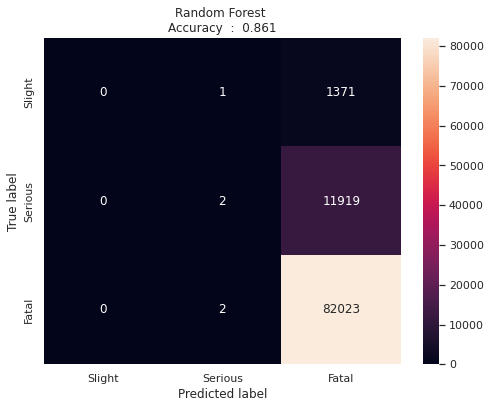

In [200]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(ytest, rf_pred) 
cm_df = pd.DataFrame(cm,
                      index = ['Slight','Serious','Fatal'], 
                     columns = [ 'Slight','Serious','Fatal']   
                     )

import seaborn as sns
sns.set()

plt.figure(figsize=(8,6))
sns.heatmap(cm_df, annot=True , fmt='d')

plt.title('Random Forest \nAccuracy  :  {0:.3f}'.format(accuracy_rf))
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()


### ROC Curve for Random Forest

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.




AUC for Class 1: 0.8387950588387759
AUC for Class 2: 0.7094186160387674
AUC for Class 3: 0.7274122568835342


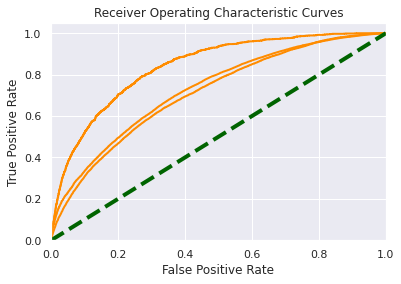

In [201]:
# Fit the model
from sklearn.metrics import auc, roc_curve, roc_auc_score

model = clf_rf.fit(xtrain, ytrain)

#Calculate the y_score

yscore = model.predict_proba(xtest)

#Binarize the output
from sklearn.preprocessing import label_binarize

ytest_bin = label_binarize(ytest, classes=[0 , 1, 2])
n_classes = ytest_bin.shape[1]

fpr = dict()
tpr = dict()
roc_auc = dict()

print("\n")
for i in range(n_classes):

  fpr[i], tpr[i], _= roc_curve(ytest_bin[:, i], yscore[:, i])
  plt.plot(fpr[i], tpr[i], color='darkorange', lw=2)
  print('AUC for Class {}: {}'.format(i+1, auc(fpr[i], tpr[i])))

plt.plot([0, 1], [0, 1], color="darkgreen" , lw=4, linestyle='--' )
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic Curves')
plt.show( )

### Features Importance

In [202]:
features_tuple = list(zip(X.columns, clf_rf.feature_importances_))

In [203]:
feature_imp = pd.DataFrame(features_tuple, columns=[
                           "Feature Names", "Importance"])

feature_imp 

,Feature Names,Importance
0,1st_Road_Class,0.003784
1,1st_Road_Number,0.005633
2,2nd_Road_Class,0.006044
3,2nd_Road_Number,0.005589
4,Carriageway_Hazards,0.000649
5,Day_of_Week,0.001527
6,Did_Police_Officer_Attend_Scene_of_Accident,0.101461
7,Junction_Control,0.003129
8,Junction_Detail,0.007027
9,Latitude,0.012778


In [254]:
feature_imp = feature_imp.sort_values("Importance", ascending=False)

Text(0.5, 1.0, 'Random Forest Classifier - Features Importance')

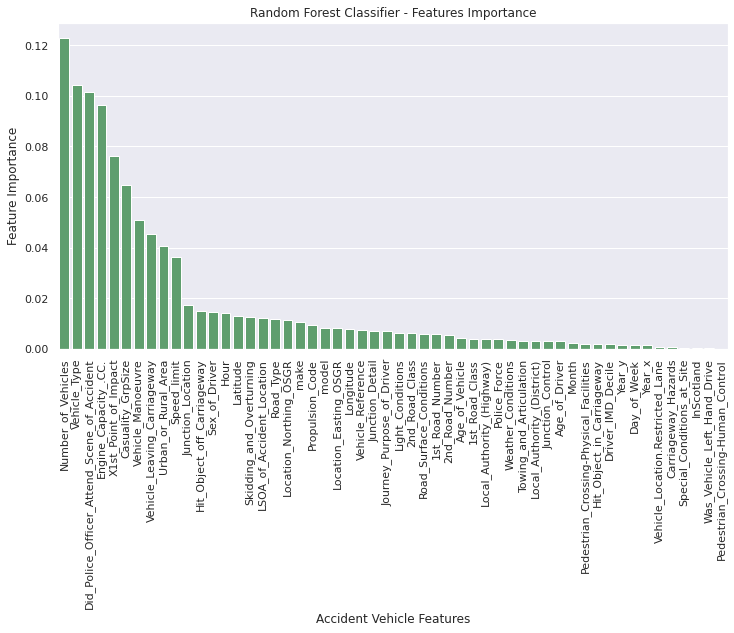

In [255]:
import seaborn as sns
sns.set()
plt.figure(figsize=(12, 6))
sns.barplot(x="Feature Names", y="Importance", data=feature_imp, color='g')
plt.xlabel("Accident Vehicle Features")
plt.ylabel("Feature Importance")
plt.xticks(rotation=90)
plt.title("Random Forest Classifier - Features Importance")

## Hyperparameter Tuning using GridSearchCV

In [206]:
#from sklearn.model_selection import GridSearchCV

## Making grid of parameters and running GridSearch CV

#param_grid1 = {"n_estimators": [9, 18, 27],
               #"max_depth": [3, 5, 10  ],
               #"min_samples_leaf": [1, 2, 4 ]}

#RF = RandomForestClassifier(random_state=100)
# Instantiate the GridSearchCV object: logreg_cv
#RF_cv1 = GridSearchCV(RF, param_grid1, cv=5, scoring='accuracy', n_jobs=4)



In [207]:

# Fit it to the data
#RF_cv1.fit(xtrain, ytrain)

# RF_cv1.cv_results_,
#RF_cv1.best_params_, RF_cv1.best_score_


In [208]:
#param_grid2 = {
    
    #          "n_estimators": [100,200],
              #"max_depth": [5, 6, 7, 8 ],
              #"min_samples_leaf": [1, 2, 3]}

    #} 
#RF = RandomForestClassifier(random_state=100)
# Instantiate the GridSearchCV object: logreg_cv
#RF_cv2 = GridSearchCV(estimator=RF, param_grid2, cv=5, scoring='accuracy', n_jobs=4)

# Fit it to the data
#RF_cv2.fit(xtrain, ytrain)


In [209]:
# RF_cv2.grid_scores_
#RF_cv2.best_params_, 
#RF_cv2.best_score_

### Tuned Random Forest

In [210]:
#RF_grid = RF_cv2.best_estimator_
#RF_grid.fit(xtrain, ytrain)
#rf_pred_t = RF_grid.predict(xtest)
#rf_pred_prb_t = RF_grid.predict_proba(xtest)[:, 1]

### Accuracy for Tuned Random Forest

In [211]:
#write code here 
#accuracy_rf_t = accuracy_score(ytest,rf_pred_t)
#print("Accuracy after tuning: {}".format(accuracy_rf_t))

### Recall for Tuned Random Forest

In [212]:
#recall_rf_t=recall_score(ytest,rf_pred_t)
#recall_rf_t

### Precision for Tuned Random Forest

In [213]:
#precision_rf_t=precision_score(ytest, rf_pred_t)
#precision_rf_t

### F1 Score

In [214]:
#rf_t_f1=f1_score(ytest,rf_pred_t)
#rf_t_f1

 ### Classification Report for Tuned Random Forest

In [215]:
#print(classification_report(ytest,rf_pred_t))

In [216]:
#     auc_rf_t = roc_auc_score(ytest, rf_pred_prb_t)
#     fpr, tpr, threshold = aroc_curve(ytest, rf_pred_prb_t)
#     plot_roc_curve(fpr, tpr, label='AUC Tuned = %0.3f' % auc_rf_t)

### ROC Curve for Tuned Random Forest

In [217]:
# Fit the model
#from sklearn.metrics import auc, roc_curve, roc_auc_score

#model_t = RF_grid.fit(xtrain, ytrain)

#Calculate the y_score
#yscore_t = model_t.predict_proba(xtest)

#Binarize the output
#from sklearn.preprocessing import label_binarize

#ytest_bin = label_binarize(ytest, classes=[0 , 1, 2])
#n_classes = ytest_bin.shape[1]

#fpr = dict()
#tpr = dict()
#roc_auc = dict()

#for i in range(n_classes):
  #fpr[i], tpr[i], _ = roc_curve(ytest_bin[:, i], yscore_t[:, i])
  #plt.plot(fpr[i], tpr[i], color='darkorange', lw=2)
  #print('AUC for Class {}: {}'.format(i+1, auc(fpr[i], tpr[i])))

#plt.plot([0, 1], [0, 1], color="darkgreen" , lw=4, linestyle='--' )
#plt.xlim([0.0, 1.0])
#plt.ylim([0.0, 1.05])
#plt.xlabel('False Positive Rate')
#plt.ylabel('True Positive Rate')
#plt.title('Receiver Operating Characteristic Curves')
#plt.show( )


## Hyperparameters Tuning Using Randomized Search

In [218]:
#from sklearn.model_selection import RandomizedSearchCV
#rf_rs = RandomForestClassifier(random_state=100)

# Number of trees in random forest
#n_estimators = [int(x) for x in np.linspace(start=10, stop=1000, num=10)]
# Maximum number of levels in tree
#max_depth = [int(x) for x in np.linspace(10, 110, num=11)]
#max_depth.append(None)
# Minimum number of samples required to split a node
#min_samples_split = [2, 5, 10]

#random_grid1 = {"n_estimators": n_estimators,
                #"max_depth": max_depth,
                #"min_samples_split": min_samples_split}

In [219]:
#rf_random = RandomizedSearchCV(
    #estimator=rf_rs, param_distributions=random_grid1, n_iter=5, cv=5, verbose=2, random_state=100)
# Fit the random search model
#rf_random.fit(xtrain, ytrain)

### Selecting the best classifier

In [220]:
#clf_rf_rand = rf_random.best_estimator_

#clf_rf_rand.fit(xtrain, ytrain)

#pred_rf_rand = clf_rf_rand.predict(xtest)

#prb_rf_rand = clf_rf_rand.predict_proba(xtest)[:, 1]

#### Accuracy of Tuned Random Forest through Randomized Search

In [221]:
#accuracy_rf_r= accuracy_score(ytest,pred_rf_rand)
#accuracy_rf_r

#### Precision of Tuned Random Forest through Randomized Search

In [222]:
#precision_rf_r=precision_score(ytest,pred_rf_rand , average='macro')
#precision_rf_r

### Recall of Tuned Random Forest through Randomized Search

In [223]:
#recall_rf_r=recall_score(ytest,pred_rf_rand , average = 'macro')
#recall_rf_r

#### F1-Score of Tuned Random Forest through Randomized Search

In [224]:
#f1_rf_r=f1_score(ytest,pred_rf_rand , average = 'macro')
#f1_rf_r

### Classification Report of Tuned Random Forest through Randomized Search

In [252]:
#print(classification_report(ytest,pred_rf_rand))

## Ada Boost

In [226]:
from sklearn.ensemble import AdaBoostClassifier

In [227]:
clf_adb = AdaBoostClassifier(random_state=100)
clf_adb.fit(xtrain, ytrain)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


AdaBoostClassifier(random_state=100)

In [228]:
pred_clf_adb = clf_adb.predict(xtest)

In [229]:
adb_pred_prb = clf_adb.predict_proba(xtest)[:, 1]

#### Accuracy for Ada Boost

In [230]:
from sklearn.metrics import accuracy_score
accuracy_adb=accuracy_score(ytest,pred_clf_adb)
accuracy_adb

0.8606559096917686

### Precision for Ada Boost

In [231]:
from sklearn.metrics import precision_score
precision_adb=precision_score(ytest, pred_clf_adb , average = 'macro')
precision_adb

0.5207165849697971

### Recall for Ada Boost

In [232]:
from sklearn.metrics import recall_score
recall_adb=recall_score(ytest,pred_clf_adb , average='macro')
recall_adb

0.3415736281938631

### F1 Score for Ada Boost

In [233]:
from sklearn.metrics import f1_score
f1_adb=f1_score(ytest, pred_clf_adb , average='macro')
f1_adb

0.32574100679451723

### Classification Report for Ada Boost

In [234]:
from sklearn.metrics import classification_report
print(classification_report(ytest,pred_clf_adb))

              precision    recall  f1-score   support

           0       0.23      0.01      0.02      1372
           1       0.47      0.02      0.03     11921
           2       0.86      1.00      0.93     82025

    accuracy                           0.86     95318
   macro avg       0.52      0.34      0.33     95318
weighted avg       0.80      0.86      0.80     95318



### Confusion Matrix for AdaBoost

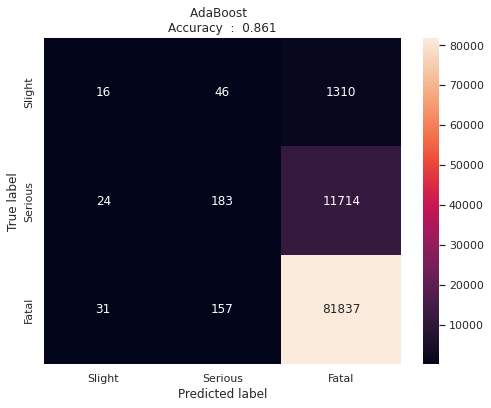

In [236]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(ytest, pred_clf_adb) 
cm_df = pd.DataFrame(cm,
                      index = ['Slight','Serious','Fatal'], 
                     columns = [ 'Slight','Serious','Fatal']   
                     )

import seaborn as sns
sns.set()

plt.figure(figsize=(8,6))
sns.heatmap(cm_df, annot=True , fmt='d')

plt.title('AdaBoost  \nAccuracy  :  {0:.3f}'.format(accuracy_adb))
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

#### ROC Curve for AdaBoost

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)




AUC for Class 1: 0.8319278454361754
AUC for Class 2: 0.547070290961073
AUC for Class 3: 0.7115381482504846


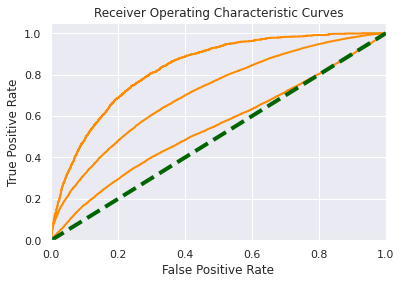

In [237]:
from sklearn.metrics import auc, roc_curve, roc_auc_score

model = clf_adb.fit(xtrain, ytrain)

#Calculate the y_score

yscore = model.predict_proba(xtest)

#Binarize the output
from sklearn.preprocessing import label_binarize

ytest_bin = label_binarize(ytest, classes=[0 , 1, 2])
n_classes = ytest_bin.shape[1]

fpr = dict()
tpr = dict()
roc_auc = dict()

print("\n")
for i in range(n_classes):
  fpr[i], tpr[i], _ = roc_curve(ytest_bin[:, i], yscore[:, i])
  plt.plot(fpr[i], tpr[i], color='darkorange', lw=2)
  print('AUC for Class {}: {}'.format(i+1, auc(fpr[i], tpr[i])))

plt.plot([0, 1], [0, 1], color="darkgreen" , lw=4, linestyle='--' )
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic Curves')
plt.show( )

## XGBoost
### Extreme Gradient Boosting Algorithm

In [238]:
!pip install xgboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [239]:
import xgboost as xgb

In [240]:
clf_xgb = xgb.XGBClassifier(seed=25,nthread=1,random_state=100)

In [241]:
clf_xgb.fit(xtrain, ytrain)

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


XGBClassifier(nthread=1, objective='multi:softprob', random_state=100, seed=25)

In [242]:
xgb_pred = clf_xgb.predict(xtest)
xgb_pred_prb=clf_xgb.predict_proba(xtest)[:,1]

### Accuracy of XGBoost

In [243]:
accuracy_xgb = accuracy_score(ytest,xgb_pred)
print("Accuracy: {}".format(accuracy_xgb))

Accuracy: 0.8610755576071676


### Recall of XGBoost

In [244]:
recall_xgb = recall_score(ytest,xgb_pred , average='macro')
recall_xgb

0.33700544543627303

### Precision of XGBoost

In [245]:
precision_xgb = precision_score(ytest,xgb_pred , average='macro')
precision_xgb

0.660011555387512

#### F1 Score XGB

In [246]:
xgb_f1=f1_score(ytest, xgb_pred , average='macro')
xgb_f1


0.316188650468008

### Classification Report of XGBoost

In [247]:
print(classification_report(ytest,xgb_pred))

              precision    recall  f1-score   support

           0       0.57      0.00      0.01      1372
           1       0.55      0.01      0.02     11921
           2       0.86      1.00      0.93     82025

    accuracy                           0.86     95318
   macro avg       0.66      0.34      0.32     95318
weighted avg       0.82      0.86      0.80     95318



### Confusion Matrix for XGBoost

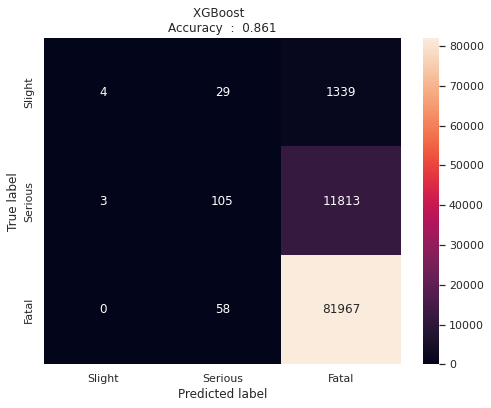

In [248]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(ytest, xgb_pred) 
cm_df = pd.DataFrame(cm,
                      index = ['Slight','Serious','Fatal'], 
                     columns = [ 'Slight','Serious','Fatal']   
                     )

import seaborn as sns
sns.set()

plt.figure(figsize=(8,6))
sns.heatmap(cm_df, annot=True , fmt='d')

plt.title('XGBoost  \nAccuracy  :  {0:.3f}'.format(accuracy_xgb))
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

#### Roc curve for XGBoost

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)




AUC for Class 1: 0.8406586883638073
AUC for Class 2: 0.7159867336399031
AUC for Class 3: 0.734608596673942


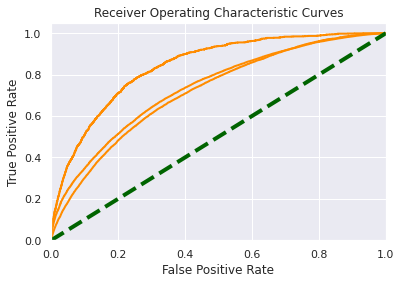

In [249]:
from sklearn.metrics import auc, roc_curve, roc_auc_score

model = clf_xgb.fit(xtrain, ytrain)

#Calculate the y_score

yscore = model.predict_proba(xtest)

#Binarize the output
from sklearn.preprocessing import label_binarize

ytest_bin = label_binarize(ytest, classes=[0 , 1, 2])
n_classes = ytest_bin.shape[1]

fpr = dict()
tpr = dict()
roc_auc = dict()

print("\n")
for i in range(n_classes):
  fpr[i], tpr[i], _ = roc_curve(ytest_bin[:, i], yscore[:, i])
  plt.plot(fpr[i], tpr[i], color='darkorange', lw=2)
  print('AUC for Class {}: {}'.format(i+1, auc(fpr[i], tpr[i])))

plt.plot([0, 1], [0, 1], color="darkgreen" , lw=4, linestyle='--' )
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic Curves')
plt.show( )

## Comparison

In [250]:
comparison_dict={"Algorithm":["Random Forest","XGBoost","Ada Boost"],
                 "Accuracy":[accuracy_rf, accuracy_xgb, accuracy_adb],
                 "Precision":[precision_rf, precision_xgb,precision_adb],
                 "Recall":[recall_rf,recall_xgb,recall_adb],
                 "F1 Score":[rf_f1,xgb_f1,f1_adb]
                }

In [251]:
comparison = pd.DataFrame(comparison_dict)
comparison.sort_values(['Recall', 'Accuracy'], ascending=False)

,Algorithm,Accuracy,Precision,Recall,F1 Score
2,Ada Boost,0.860656,0.520717,0.341574,0.325741
1,XGBoost,0.861076,0.660012,0.337005,0.316189
0,Random Forest,0.860541,0.420188,0.333381,0.308461
